In [266]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, roc_curve, roc_auc_score, precision_recall_curve

In [267]:
%matplotlib inline

### Explore the data

In [268]:
df = pd.read_csv('data/bioresponse.csv', header=0)

In [269]:
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [270]:
# Split data into train and test sets
train_data, test_data = train_test_split(df, test_size = 0.3, train_size=0.7, random_state = 1)

In [271]:
train_data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
1082,0,0.166667,0.845130,0.10,0.25,0.201773,0.692522,0.255605,0.585445,0.708156,...,0,0,0,0,0,0,0,0,0,0
3748,0,0.200000,0.520564,0.00,0.00,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
2694,1,0.000000,0.513633,0.10,0.00,0.133017,0.600205,0.284122,0.585445,0.689901,...,0,0,0,0,0,0,0,0,0,0
1647,0,0.033300,0.699499,0.05,0.00,0.246230,0.543822,0.449909,0.662678,0.642920,...,0,0,0,0,0,0,0,0,0,0
607,1,0.066700,0.742629,0.20,0.00,0.118101,0.620825,0.296164,0.580159,0.673341,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1,0.066700,0.558369,0.05,0.00,0.221304,0.763411,0.217283,0.296132,0.850644,...,0,0,0,0,0,0,0,0,0,0
905,1,0.000000,0.660245,0.10,0.00,0.141600,0.611352,0.396943,0.612558,0.703160,...,0,0,0,0,0,0,0,0,0,0
1096,0,0.000000,0.502836,0.00,0.00,0.254729,0.602604,0.381471,0.562734,0.702913,...,0,0,0,0,0,0,0,0,0,0
235,1,0.066700,0.595049,0.15,0.25,0.176495,0.771636,0.215249,0.460723,0.829922,...,1,0,1,1,0,0,0,0,0,1


In [272]:
# Organization X and y data sets
train_X = train_data.drop(columns=['Activity'])
train_y = train_data['Activity']

test_X = test_data.drop(columns=['Activity'])
test_y = test_data['Activity']

In [273]:
train_y

1082    0
3748    0
2694    1
1647    0
607     1
       ..
2763    1
905     1
1096    0
235     1
1061    0
Name: Activity, Length: 2625, dtype: int64

### Decision Tree Classifier

### Small decision tree

In [274]:
# Small Decision Tree
clf = tree.DecisionTreeClassifier(random_state=100, max_depth=2)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=2, random_state=100)

In [279]:
# Make predictions for test data
predictions = clf.predict(test_X)

In [280]:
predictions

array([1, 0, 0, ..., 0, 1, 0])

In [281]:
# Got the probalities for classes
proba = clf.predict_proba(test_X)

#### Metrics calculation

Precision

In [282]:
precision_score(test_y, predictions)

0.748587570621469

Recall

In [283]:
recall_score(test_y, predictions)

0.8520900321543409

Accuracy

In [284]:
metrics.accuracy_score(test_y, predictions)

0.7602131438721137

F1-score

In [285]:
f1_score(test_y, predictions)

0.7969924812030076

Log-loss

In [286]:
log_loss(test_y, predictions)

8.282071007964884

Precision-recall curve

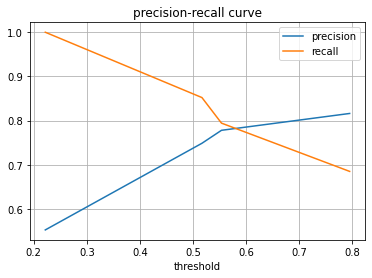

In [287]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

precision, recall, threshold = precision_recall_curve(test_y, proba[:, 1])
fpr, tpr, thr = roc_curve(test_y, proba[:, 1])

ax.plot(threshold, precision[:-1], label="precision")
ax.plot(threshold, recall[:-1], label="recall")
ax.set_xlabel("threshold")
ax.set_title("precision-recall curve")
ax.legend()
ax.grid()

ROC curve

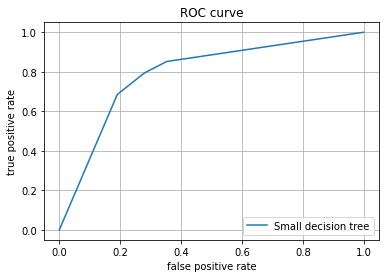

In [288]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(fpr, tpr, label='Small decision tree')
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("ROC curve")
ax.legend(loc=4)
ax.grid()

#### Deep decision tree 

In [289]:
# Deep decision Tree
clf = tree.DecisionTreeClassifier(random_state=100, max_depth=10)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=10, random_state=100)

In [290]:
# Make predictions for test data
predictions = clf.predict(test_X)

In [291]:
# Got the probalities for classes
proba = clf.predict_proba(test_X)

#### Metrics calculation

Precision

In [292]:
precision_score(test_y, predictions)

0.7784810126582279

Recall

In [293]:
recall_score(test_y, predictions)

0.7909967845659164

Accuracy

In [294]:
metrics.accuracy_score(test_y, predictions)

0.7602131438721137

F1-score

In [295]:
f1_score(test_y, predictions)

0.7846889952153111

Log-loss

In [296]:
log_loss(test_y, predictions)

8.282044023326922

Precision-recall curve

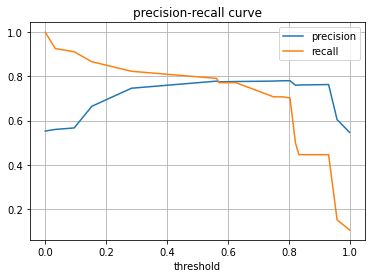

In [297]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

precision, recall, threshold = precision_recall_curve(test_y, proba[:, 1])
fpr, tpr, thr = roc_curve(test_y, proba[:, 1])

ax.plot(threshold, precision[:-1], label="precision")
ax.plot(threshold, recall[:-1], label="recall")
ax.set_xlabel("threshold")
ax.set_title("precision-recall curve")
ax.legend()
ax.grid()

ROC curve

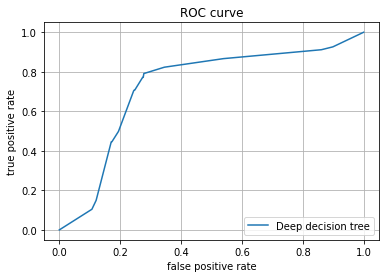

In [298]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(fpr, tpr, label='Deep decision tree')
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("ROC curve")
ax.legend(loc=4)
ax.grid()

### Random Forest Classifier

#### Random Forest on small trees

In [345]:
# Random forest on small trees
rf_classifier = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 100)

In [346]:
rf_classifier.fit(train_X, train_y)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=100)

In [347]:
# Make predictions for test data
predictions = rf_classifier.predict(test_X)

In [348]:
# Got the probalities for classes
proba = rf_classifier.predict_proba(test_X)

In [349]:
proba

array([[0.53495267, 0.46504733],
       [0.50276636, 0.49723364],
       [0.49053216, 0.50946784],
       ...,
       [0.56490459, 0.43509541],
       [0.3722797 , 0.6277203 ],
       [0.51452887, 0.48547113]])

#### Metrics calculation

Precision

In [350]:
precision_score(test_y, predictions)

0.7259475218658892

Recall

In [351]:
recall_score(test_y, predictions)

0.8006430868167203

Accuracy

In [352]:
metrics.accuracy_score(test_y, predictions)

0.7229129662522202

F1-score

In [353]:
f1_score(test_y, predictions)

0.7614678899082569

Log-loss

In [354]:
log_loss(test_y, predictions)

9.570380603489351

Precision-recall curve

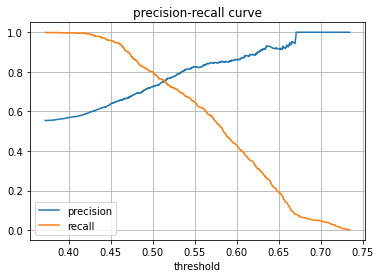

In [355]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

precision, recall, threshold = precision_recall_curve(test_y, proba[:, 1])
fpr, tpr, thr = roc_curve(test_y, proba[:, 1])

ax.plot(threshold, precision[:-1], label="precision")
ax.plot(threshold, recall[:-1], label="recall")
ax.set_xlabel("threshold")
ax.set_title("precision-recall curve")
ax.legend()
ax.grid()

ROC curve

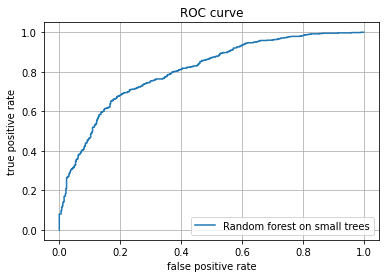

In [356]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(fpr, tpr, label='Random forest on small trees')
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("ROC curve")
ax.legend(loc=4)
ax.grid()

#### Random Forest on deep trees

In [357]:
# Random forest on deep trees
rf_classifier = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 100)

In [358]:
rf_classifier.fit(train_X, train_y)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=100)

In [359]:
# Make predictions for test data
predictions = rf_classifier.predict(test_X)

In [360]:
# Got the probalities for classes
proba = rf_classifier.predict_proba(test_X)

In [361]:
proba

array([[0.57093253, 0.42906747],
       [0.46635987, 0.53364013],
       [0.87103616, 0.12896384],
       ...,
       [0.72700988, 0.27299012],
       [0.20749669, 0.79250331],
       [0.72489912, 0.27510088]])

#### Metrics calculation

Precision

In [362]:
precision_score(test_y, predictions)

0.8094462540716613

Recall

In [363]:
recall_score(test_y, predictions)

0.7990353697749196

Accuracy

In [364]:
metrics.accuracy_score(test_y, predictions)

0.7850799289520426

F1-score

In [365]:
f1_score(test_y, predictions)

0.8042071197411004

Log-loss

In [366]:
log_loss(test_y, predictions)

7.423159360983765

Precision-recall curve

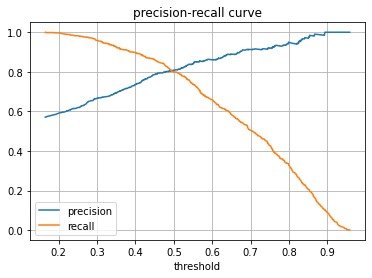

In [367]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

precision, recall, threshold = precision_recall_curve(test_y, proba[:, 1])
fpr, tpr, thr = roc_curve(test_y, proba[:, 1])

ax.plot(threshold, precision[:-1], label="precision")
ax.plot(threshold, recall[:-1], label="recall")
ax.set_xlabel("threshold")
ax.set_title("precision-recall curve")
ax.legend()
ax.grid()

ROC curve

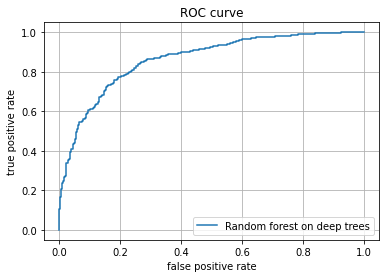

In [368]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(fpr, tpr, label='Random forest on deep trees')
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("ROC curve")
ax.legend(loc=4)
ax.grid()

### A classifier that avoids False Negative errors

The one of the approaches to build a classifier that avoid FN errors is changing the learning rate 𝛼 for both the classes should be different. So by using the weight update scheme with Random Forest Classifier on deep trees (max depth = 10) and set class weights as 1 for 0 class and 100 for 1 class, got the following results:

In [405]:
# Random forest on small trees
rf_classifier = RandomForestClassifier(n_estimators = 50, max_depth = 10, class_weight={0: 1, 1: 100}, random_state = 100)

In [406]:
rf_classifier.fit(train_X, train_y)

RandomForestClassifier(class_weight={0: 1, 1: 100}, max_depth=10,
                       n_estimators=50, random_state=100)

In [407]:
# Make predictions for test data
predictions = rf_classifier.predict(test_X)

In [408]:
# Got the probalities for classes
proba = rf_classifier.predict_proba(test_X)

In [409]:
proba

array([[0.10613232, 0.89386768],
       [0.07065404, 0.92934596],
       [0.10955115, 0.89044885],
       ...,
       [0.01186062, 0.98813938],
       [0.08614368, 0.91385632],
       [0.01112458, 0.98887542]])

#### Metrics calculation

Precision

In [410]:
precision_score(test_y, predictions)

0.5575539568345323

Recall

In [411]:
recall_score(test_y, predictions)

0.9967845659163987

Accuracy

In [412]:
metrics.accuracy_score(test_y, predictions)

0.5612788632326821

F1-score

In [413]:
f1_score(test_y, predictions)

0.7151095732410611

Log-loss

In [414]:
log_loss(test_y, predictions)

15.15324062257685

Precision-recall curve

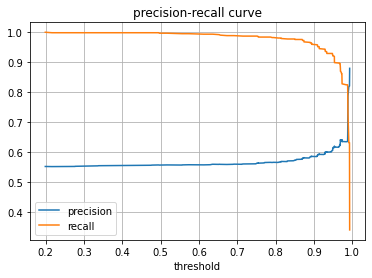

In [415]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

precision, recall, threshold = precision_recall_curve(test_y, proba[:, 1])
fpr, tpr, thr = roc_curve(test_y, proba[:, 1])

ax.plot(threshold, precision[:-1], label="precision")
ax.plot(threshold, recall[:-1], label="recall")
ax.set_xlabel("threshold")
ax.set_title("precision-recall curve")
ax.legend()
ax.grid()

ROC curve

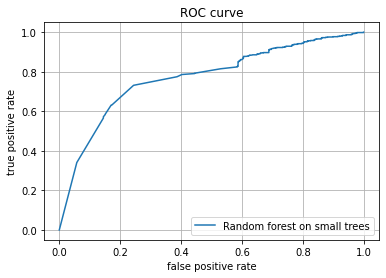

In [416]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(fpr, tpr, label='Random forest on small trees')
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("ROC curve")
ax.legend(loc=4)
ax.grid()